# Métodos kernel para clasificación

I am going to consider the dataset "Rain in Australia", which aims to predict wether the next day it will rain or not, based on some atmospheric measurements:

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/data

In [30]:
# Import basic libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
my_file = "weatherAUS.csv"
rain = pd.read_csv(my_file)

In [54]:
# Look at the available variables
for var in rios.columns:
    print(var)

Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RISK_MM
RainTomorrow


In [43]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [86]:
# Many cities are available: maybe we can focus on just one of them
print(set(rain.Location))

brisbane = rain[rain.Location == "Brisbane"]
brisbane.head()

{'NorahHead', 'Melbourne', 'Canberra', 'Cobar', 'Brisbane', 'Moree', 'Williamtown', 'Portland', 'Wollongong', 'Tuggeranong', 'Mildura', 'GoldCoast', 'PerthAirport', 'Newcastle', 'Nhil', 'Sydney', 'Ballarat', 'Dartmoor', 'SalmonGums', 'Townsville', 'Walpole', 'MountGambier', 'Launceston', 'Perth', 'PearceRAAF', 'SydneyAirport', 'Witchcliffe', 'BadgerysCreek', 'Cairns', 'Darwin', 'NorfolkIsland', 'MountGinini', 'Katherine', 'Richmond', 'Woomera', 'CoffsHarbour', 'Uluru', 'Adelaide', 'Albany', 'Sale', 'Nuriootpa', 'WaggaWagga', 'MelbourneAirport', 'Hobart', 'Albury', 'Penrith', 'Bendigo', 'Watsonia', 'AliceSprings'}


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
81694,2008-07-01,Brisbane,10.3,25.2,0.0,1.4,9.5,WNW,26.0,SSW,...,37.0,1019.6,1014.8,0.0,1.0,14.9,24.6,No,0.0,No
81695,2008-07-02,Brisbane,8.1,22.9,0.0,2.0,9.8,W,30.0,W,...,30.0,1018.8,1015.0,0.0,0.0,16.2,22.4,No,0.0,No
81696,2008-07-03,Brisbane,9.7,22.4,0.0,5.8,9.4,E,22.0,SW,...,52.0,1021.4,1019.1,1.0,4.0,15.4,21.3,No,0.8,No
81697,2008-07-04,Brisbane,11.8,20.0,0.8,1.8,1.1,SW,24.0,SW,...,53.0,1023.5,1021.7,7.0,7.0,14.1,19.6,No,0.0,No
81698,2008-07-05,Brisbane,12.3,16.7,0.0,2.0,0.3,S,37.0,S,...,89.0,1027.3,1026.2,7.0,8.0,16.1,15.0,No,16.2,Yes


In [91]:
# Evaporation and Sunshine are empty: let's remove them
# I shall remove also categorical variables, like the wind direction
# I know the location, so I can remove it, and I am not interested in the date
droplist = ["Evaporation", "Sunshine", "WindGustDir", "WindDir9am", "WindDir3pm", "Location", "Date", "RainToday", "RISK_MM"]
brisbane_slim = brisbane.drop(droplist, axis = 1)

brisbane_slim.dropna(how='any', inplace = True)
len(brisbane_slim)

3106

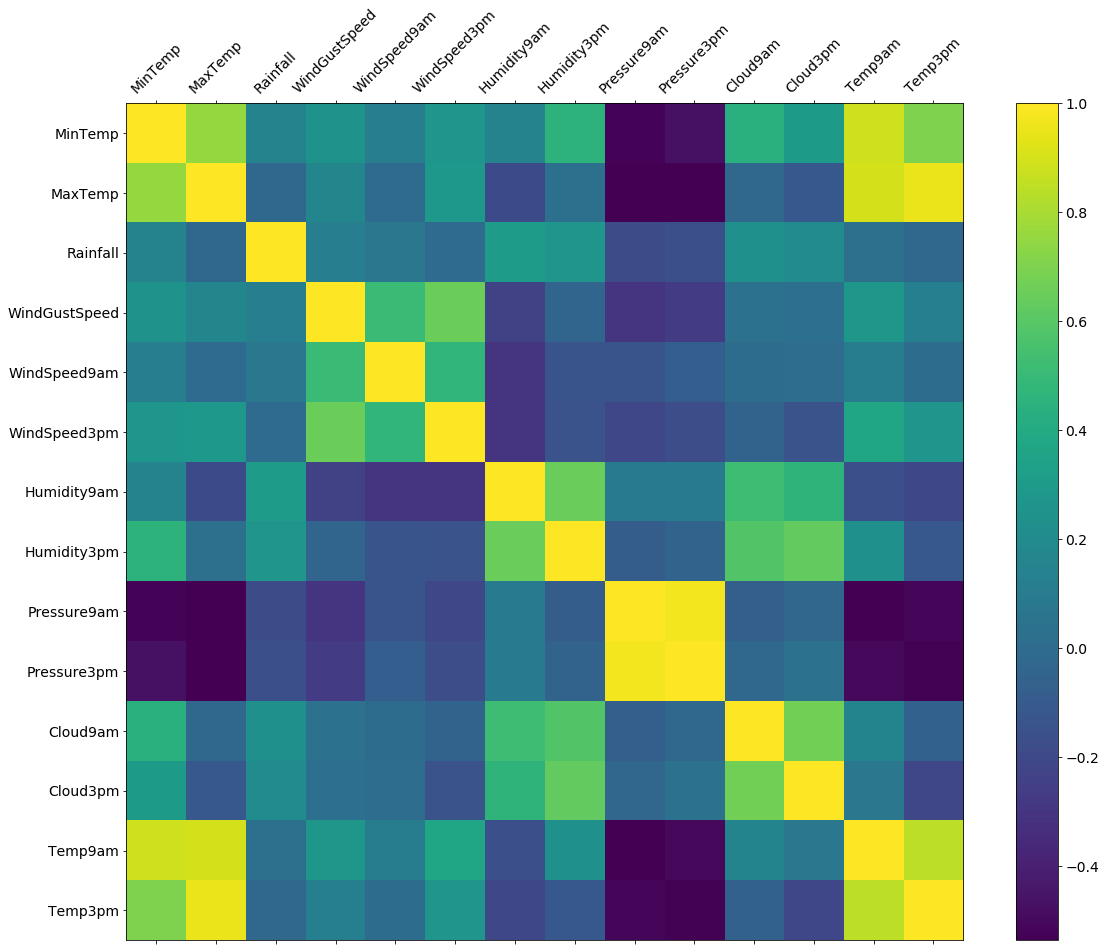

In [100]:
# Check the correlation among variables,
# to see if it is possible to remove some of them
# (https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas)

f = plt.figure(figsize=(19, 15))
plt.matshow(brisbane_slim.corr(), fignum=f.number)
plt.xticks(range(brisbane_slim.shape[1] - 1), brisbane_slim.columns, fontsize=14, rotation=45)
plt.yticks(range(brisbane_slim.shape[1] - 1), brisbane_slim.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);